In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_names = ['organic', 'recycle']

def load_dataset(data_dir):
    """
    Load dataset from the given directory.
    Args:
        data_dir (str): Path to dataset folder containing class subfolders.
    Returns:
        X (np.ndarray): Array of image data.
        y (np.ndarray): Array of corresponding labels.
    """
    X, y = [], []

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(data_dir, class_name[0].upper())  # O or R
        if not os.path.exists(class_folder):
            raise FileNotFoundError(f"Folder not found: {class_folder}")

        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            try:
                img = load_img(img_path, target_size=(80, 80))
                img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    return np.array(X), np.array(y)

# Define the absolute paths to the dataset
train_data_dir = r'C:\Users\haric\OneDrive\Desktop\client\myfinalyrproject\training\DATASET\TRAIN'
test_data_dir = r'C:\Users\haric\OneDrive\Desktop\client\myfinalyrproject\training\DATASET\TEST'

# Load the datasets
X_train, y_train = load_dataset(train_data_dir)
X_test, y_test = load_dataset(test_data_dir)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")



Training data: (22564, 80, 80, 3), (22564,)
Test data: (2513, 80, 80, 3), (2513,)


In [2]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define class names and image dimensions
class_names = ['organic', 'recycle']
IMG_WIDTH, IMG_HEIGHT = 80, 80
EPOCHS = 10
BATCH_SIZE = 32

# Define paths to the dataset
train_data_dir = r'C:\Users\haric\OneDrive\Desktop\client\myfinalyrproject\training\DATASET\TRAIN'
test_data_dir = r'C:\Users\haric\OneDrive\Desktop\client\myfinalyrproject\training\DATASET\TEST'

def load_dataset(data_dir):
    """Loads the dataset and returns images and labels as numpy arrays."""
    X, y = [], []

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(data_dir, class_name[0].upper())  # O or R
        if not os.path.exists(class_folder):
            raise FileNotFoundError(f"Folder not found: {class_folder}")

        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            try:
                img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
                img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    return np.array(X), np.array(y)

# Load training and test datasets
X_train, y_train = load_dataset(train_data_dir)
X_test, y_test = load_dataset(test_data_dir)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: organic and recycle
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))
model.summary()
# Save the trained model
model.save('organic_recycle_model.h5')
print("Model saved as 'organic_recycle_model.h5'")


Training data: (22564, 80, 80, 3), (22564,)
Test data: (2513, 80, 80, 3), (2513,)


c:\Users\haric\anaconda3\envs\project\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7855 - loss: 0.4954 - val_accuracy: 0.8496 - val_loss: 0.3794
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8380 - loss: 0.3846 - val_accuracy: 0.8524 - val_loss: 0.3754
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.8507 - loss: 0.3546 - val_accuracy: 0.8854 - val_loss: 0.2846
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8665 - loss: 0.3258 - val_accuracy: 0.8766 - val_loss: 0.3222
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8881 - loss: 0.2828 - val_accuracy: 0.8993 - val_loss: 0.2853
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8974 - loss: 0.2519 - val_accuracy: 0.8874 - val_loss: 0.3118
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.9183 - loss: 0.2095 - val_accuracy: 0.8965 - val_loss: 0.2732
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.9318 - loss: 0.1749 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,021,960 (30.60 MB)

 Trainable params: 2,673,986 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,347,974 (20.40 MB)

Model saved as 'organic_recycle_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


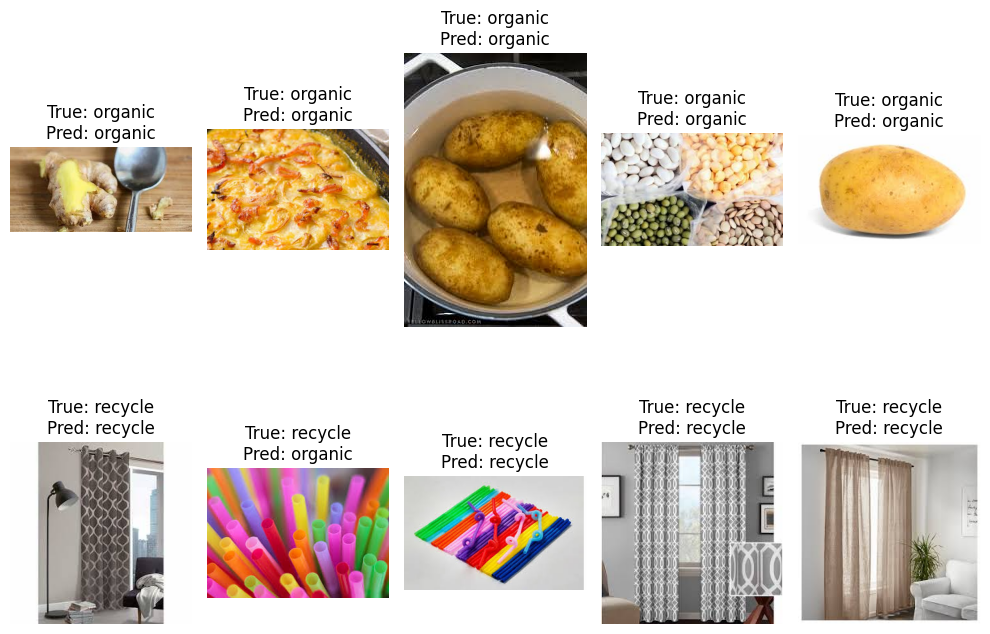

In [6]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names and paths
class_names = ['organic', 'recycle']
IMG_WIDTH, IMG_HEIGHT = 80, 80
model_path = 'organic_recycle_model.h5'
test_data_dir = r'C:\Users\haric\OneDrive\Desktop\client\myfinalyrproject\training\DATASET\TEST'

# Load the trained model
model = load_model(model_path)

def preprocess_image(img_path):
    """Preprocesses an image to the required input size."""
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_image(img_path):
    """Predicts the class of the given image."""
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

def display_predictions():
    """Displays 5 random images from each class with true and predicted labels."""
    plt.figure(figsize=(10, 8))

    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(test_data_dir, class_name[0].upper())  # O or R
        random_images = random.sample(os.listdir(class_folder), 5)

        for i, img_name in enumerate(random_images):
            img_path = os.path.join(class_folder, img_name)
            predicted_class = predict_image(img_path)

            plt.subplot(2, 5, idx * 5 + i + 1)
            img = load_img(img_path)
            plt.imshow(img)
            plt.title(f"True: {class_name}\nPred: {predicted_class}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    display_predictions()
